# Top Trendings do Twitter
**Objetivos:** Desenvolver uma aplicação para monitorar o top trending e seu devido volume na rede social com o passar do tempo.

## Funcionalidades
**Requisitos funcionais obrigatorios**:
- [X] Utilizar a api do twitter para consumir o top trending e seu devido volume.
- [X] Armazenar o histórico das trendings em um banco de dados noSQL.
- [X] Utilizar alguma biblioteca gráfica para exibir os dados.

**Requisito funcional opcional**:
- [X] Utilizar IA para análise de sentimento dos tweets referentes aos top trendings

### Instação das Bibliotecas
Para instalar as bibliotecas, será usado um arquivo de texto com todas as dependências necessarias para este projeto funcionar.

In [ ]:
! python -m pip install -r requirements.txt

### Imports

In [1]:
import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from modules import mongoDb
from modules import fileToDic as fd
from modules import apiKeys as api
from modules import mongoEnv
from modules import TwitterClient as tc
from modules import TwitterAuth as ta

## Funcionalidade 1: Consome o top trending e seu devido volume.

1. Abrir o arquivo `WOEID.txt` para poder ler os paises e seu identificadores.
2. Usando a função `dictionary` que esta no arquivo `fileToDic`, o arquivo com os paises e seus respectivos valores serão convertidos em dicionario.
3. Usando o dicionario `key` que está no arquivo `apiKeys`, o valor do `BEARER_TOKEN` no arquivo `.env` será atribuido a varivel `bearer_token`. O Bearer Token será usado na autenticação da url que retorna os *trends* de um determinado pais.
4. Para buscar o trending de um determinado pais iremos usar a url: https://api.twitter.com/1.1/trends/place.json
5. Entretanto, devemos passar o parametro que no caso é o id de um pais.

Fonte: https://developer.twitter.com/en/docs/twitter-api/v1/trends/trends-for-location/api-reference/get-trends-place

In [2]:
countries = {}
file = open("input/WOEID.txt")
countries = fd.dictionary(file, countries)

consumer_key = api.key['consumer_key']
consumer_secret = api.key['consumer_secret']
access_token = api.key['access_token']
access_token_secret = api.key['access_token_secret']
bearer_token = api.key['bearer_token']

search_url = "https://api.twitter.com/1.1/trends/place.json"

query_params = {'id': countries['BRAZIL'], 'exclude': 'hashtags'}

### Realizando a Pesquisa no Trend Tops
Dado um pais iremos procurar na url da Twitter API os top trending desse pais. No arquivo `WOEID.txt`, estão alguns pais para serem usado na pesquisa, contudo basta mudar a chave do dicionario `countries`, ex.: `countries['UNITED_STATES']`; `countries['AUSTRALIA']`; `countries['UNITED_KINGDOM']`; `countries['INDIA']`, ec.

A classe `TwitterAuth` recebe no construtor o `bearer_token` para poder colocar o seu valor no *Header Authorization* e depois a função `connect_to_endpoint` realiza o `GET` na url dada, usando os paramêtros dado. Por fim, um `json` é retornado 

In [3]:
oauth = ta.TwitterAuth(bearer_token)
top_trends = oauth.connect_to_endpoint(search_url, query_params)
print(top_trends)

200
[{'trends': [{'name': 'ios 15', 'url': 'http://twitter.com/search?q=%22ios+15%22', 'promoted_content': None, 'query': '%22ios+15%22', 'tweet_volume': 293937}, {'name': 'pabllo', 'url': 'http://twitter.com/search?q=pabllo', 'promoted_content': None, 'query': 'pabllo', 'tweet_volume': 123845}, {'name': 'zara', 'url': 'http://twitter.com/search?q=zara', 'promoted_content': None, 'query': 'zara', 'tweet_volume': 42467}, {'name': 'respect for dayane', 'url': 'http://twitter.com/search?q=%22respect+for+dayane%22', 'promoted_content': None, 'query': '%22respect+for+dayane%22', 'tweet_volume': 44695}, {'name': 'mete', 'url': 'http://twitter.com/search?q=mete', 'promoted_content': None, 'query': 'mete', 'tweet_volume': 32026}], 'as_of': '2021-09-21T13:52:53Z', 'created_at': '2021-09-20T00:36:50Z', 'locations': [{'name': 'Brazil', 'woeid': 23424768}]}]


## Funcionalidade 2: Persistir os dados

1. criar conexão com o banco, neste projeto usando o MongoDb
2. Criar um banco chamado `tweets_db`
3. Criar uma coleção chamada `top_trends`
4. Inserir a *response* nesta coleção

Fonte: https://pymongo.readthedocs.io/en/stable/tutorial.html

### Variaveis de Ambiente

In [4]:
username = mongoEnv.key_mongo['mongo_username']
pwd = mongoEnv.key_mongo['mongo_password']

### Conexão com banco de dados

In [5]:
mongo_client = mongoDb.connect_to_mongo(username, pwd, '27017')

### Criação do Banco de Dados e a Coleção

In [6]:
database = mongoDb.create_db(mongo_client, 'tweets_db')
collection = database['top_trends']

### Persistindo os dados encontrado no Json
Aqui eu decidi fazer um for para inserir um de cada vez, porém eu observei que só foi criado um unico documento, sendo que os top trendings é uma lista com os 50 top trendings da data atual.

In [7]:
for trend in top_trends:
    trend_id = collection.insert_one(trend).inserted_id

### Procurando e Printando o primeiro documento

In [8]:
pprint.pprint(collection.find_one())

{'_id': ObjectId('6147193c5b64b01e186febf6'),
 'as_of': '2021-09-19T11:04:28Z',
 'created_at': '2021-09-15T02:00:22Z',
 'locations': [{'name': 'Brazil', 'woeid': 23424768}],
 'trends': [{'name': '#Calamidade',
             'promoted_content': None,
             'query': '%23Calamidade',
             'tweet_volume': 286336,
             'url': 'http://twitter.com/search?q=%23Calamidade'},
            {'name': 'Otis',
             'promoted_content': None,
             'query': 'Otis',
             'tweet_volume': 59009,
             'url': 'http://twitter.com/search?q=Otis'},
            {'name': 'Paulo Freire',
             'promoted_content': None,
             'query': '%22Paulo+Freire%22',
             'tweet_volume': 43627,
             'url': 'http://twitter.com/search?q=%22Paulo+Freire%22'},
            {'name': 'juliette no altas horas',
             'promoted_content': None,
             'query': '%22juliette+no+altas+horas%22',
             'tweet_volume': 84069,
             

             'tweet_volume': None,
             'url': 'http://twitter.com/search?q=%22vamos+fluxo%22'},
            {'name': 'Ana Paula',
             'promoted_content': None,
             'query': '%22Ana+Paula%22',
             'tweet_volume': 10956,
             'url': 'http://twitter.com/search?q=%22Ana+Paula%22'},
            {'name': 'chico césar',
             'promoted_content': None,
             'query': '%22chico+c%C3%A9sar%22',
             'tweet_volume': None,
             'url': 'http://twitter.com/search?q=%22chico+c%C3%A9sar%22'},
            {'name': 'Rodallega',
             'promoted_content': None,
             'query': 'Rodallega',
             'tweet_volume': None,
             'url': 'http://twitter.com/search?q=Rodallega'},
            {'name': 'Khai',
             'promoted_content': None,
             'query': 'Khai',
             'tweet_volume': 18609,
             'url': 'http://twitter.com/search?q=Khai'}]}


## Funcionalidade 3: Visualizando os Dados

1. Extrair as trends de um determinado pais. 
2. Tratar dos campos NaN.
2. Usar a biblioteca pandas para criar um Dataframe dos *trends*
3. Usar a biblioteca pandas para visualizar os dados em um gráfico
4. Usar a biblioteca matplot para visualizar os dados em um gráfico 

Fontes: [Analise Exploratoria - Projeto DIO](https://github.com/LeiteSS/analise_exploratoria); [Plot With Pandas: Python Data Visualization for Beginners](https://realpython.com/pandas-plot-python/); [Return Json List And Python Requests Library](https://stackoverflow.com/questions/51458509/return-json-list-and-python-requests-library); [How to Increase Image Size of Pandas Dataframe plot in Jupyter Notebook](https://stackoverflow.com/questions/51174691/how-to-increase-image-size-of-pandas-dataframe-plot-in-jupyter-notebook) 

### Extrai as Trends

In [9]:
trends = []
for item in top_trends:
    trends = item['trends']

### Dataframe com as Trends

In [10]:
df = pd.DataFrame(trends)

#### Comandos Importantes
Deixei anexados aqui alguns comando que foram usados depois de ter convertido a lista em Dataframe.
```py
df.head() # retorna as primeiras 5 linhas (por padrão) de um dataframe

df.shape # retorna a quantidade de linha e a quantidade de colunas de um dataframe

df.dtypes # retorna o tipo de cada coluna
```

### Mudando os Nomes dos Campos

In [11]:
df_trends = df.rename(
    columns={
        'name': 'Nome', 
        'url': 'URI', 
        'promoted_content': 'Patrocinado', 
        'query': 'Hashtag', 
        'tweet_volume': 'Volume'
    }
)

### Preenche os valores *Not A Number* com Zeros

In [12]:
df_trends["Volume"].fillna(0, inplace=True)

### Agrupando os nomes com o volume de tweets
Este projeto irá apresentar o volume de tweets usando uma determinado nome que uma determinada hashtag tem.

In [13]:
# Qual o volume de tweet usando o nome como indicador
df_trends.groupby("Nome")["Volume"].mean()

Nome
ios 15                293937
mete                   32026
pabllo                123845
respect for dayane     44695
zara                   42467
Name: Volume, dtype: int64

### Traçando os Gráficos

Text(0.5, 1.0, 'Top Trendings do Twitter')

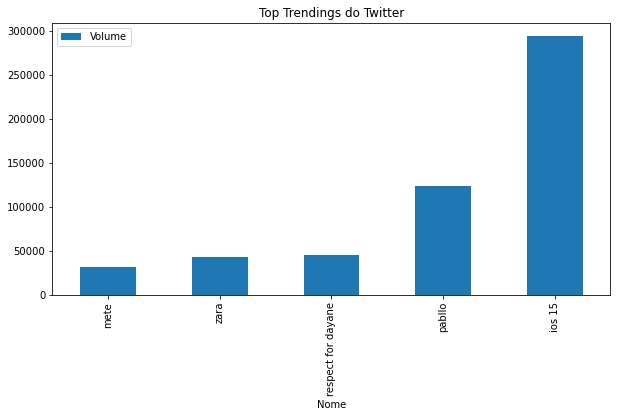

In [14]:
# Volume acima de 0
top = df_trends[df_trends["Volume"] > 0].sort_values("Volume")
top.plot(x="Nome", y=["Volume"], kind="bar", figsize=(10,5))
plt.title('Top Trendings do Twitter')

In [22]:
# Se ao rodar a proxima celula der erro é preciso ver o output dessa celular para alterar a linha x = np.linspace(0, 5, 5)
df_trends.shape

(5, 5)

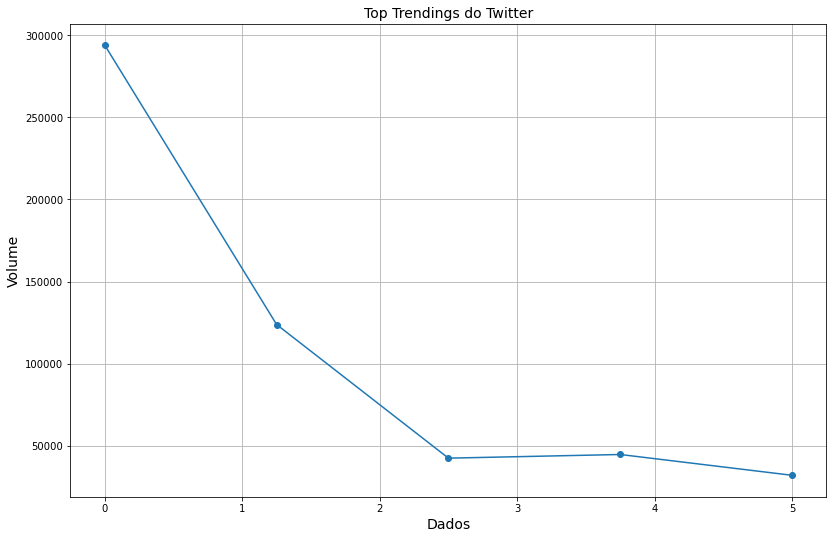

In [23]:
x = np.linspace(0, 5, 5)
fig, ax = plt.subplots(figsize=(15, 9))
fig.subplots_adjust(bottom=0.15, left=0.2)
plt.plot(x, df_trends["Volume"], marker='o')
plt.title('Top Trendings do Twitter', fontsize=14)
plt.xlabel('Dados', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Nome'>

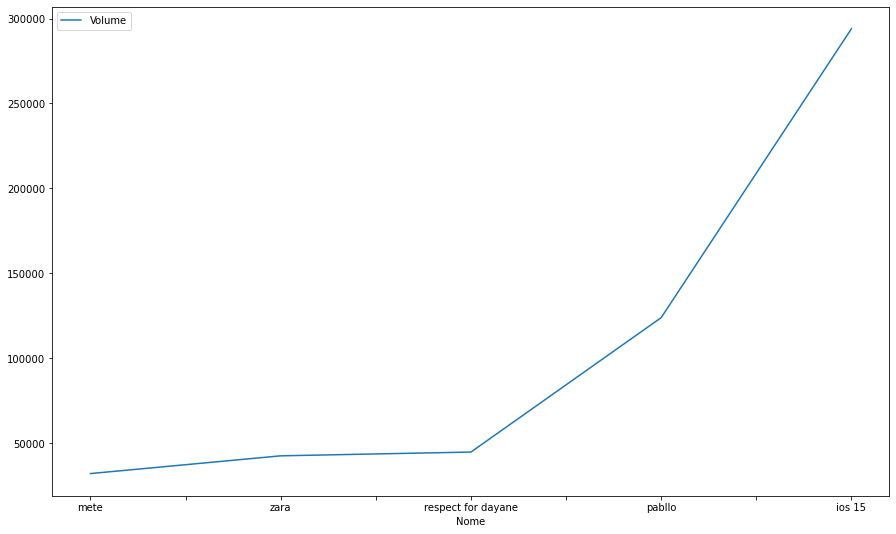

In [16]:
top = df_trends[df_trends["Volume"] > 0].sort_values("Volume")
top.plot(x="Nome", y="Volume", kind='line', figsize=(15,9))

## Funcionalidade 4: Análise de Sentimento
1. Usar o tweepy para obter os tweets.
2. Usar o textblob para analisar os tweets, afim de encontrar sentimentos.
3. Usar a lista de trends obtida na funcionalidade três para servir como paramêtro na função que obtem os tweets.

### Twitter Client

In [17]:
twitter_client = tc.TwitterClient(consumer_key, consumer_secret, access_token, access_token_secret)

### Análise Usando o Dataframe
Para ser realizado a análise de sentimento nos tweets, o laço `for` e a função `iterrows()` do `Dataframe` permite percorrer as linhas do `Dataframe` e através disso, selecionar uma coluna, neste caso a coluna `Nome`, mas pode ser também a coluna `Hashtag` pois no `json` obtido da *request* feita na **Twitter Api** essa coluna se chamava `query`. Pois bem, todos os tweets pegos usando a `query` escolhida são guardadas em uma lista para serem analisadas usando a biblioteca Textblob, se há sentimentos positivos, neutros ou negativos. Descorberto, os sentimentos é feito o calculo para descobrir a porcentagem de tweets que esse sentimento possui.

Além de claro, retornar os tweets ao final.

Fontes: [Twitter Sentiment Analysis using Python](https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/) e [How to iterate over rows in a DataFrame in Pandas](https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas)

In [18]:
for index, row in df_trends.iterrows():
    print("-----------------------------------------------------------------------------------------------------------------")
    print("O que está sendo comentado no top trendings: " + row['Nome'])
    tweets = twitter_client.get_tweets(query = row['Hashtag'], count = 200)
    
    positive_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positivo']
    
    print("Porcentagem de tweets positivos: {} %".format(100*len(positive_tweets)/len(tweets)))
    
    negatives_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negativo']
    
    print("Porcentagem de tweets negativos: {} %".format(100*len(negatives_tweets)/len(tweets)))
    
    print("Porcentagem de tweets neutros: {} % \
        ".format(100*(len(tweets) -(len( negatives_tweets )+len( positive_tweets)))/len(tweets)))
    
    print("\n\nTweets positivos:")
    for tweet in positive_tweets[:10]:
        print(tweet['text'])
        
    print("\n\nTweets negativos:")
    for tweet in negatives_tweets[:10]:
        print(tweet['text'])
    print("---------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------------------
O que está sendo comentado no top trendings: ios 15
Porcentagem de tweets positivos: 8.571428571428571 %
Porcentagem de tweets negativos: 8.571428571428571 %
Porcentagem de tweets neutros: 82.85714285714286 %         


Tweets positivos:
RT @malonso: iOS 15 introduces Drag and Drop between apps to the iPhone. Make sure to give it a try! #iOS15 https://t.co/YzXdv3ENHJ
RT @JustBuen: I don't know why they included this feature to iOS 15 but I'm glad they did. Pang senti moments #iOS15 https://t.co/Di3zDkBq9b
RT @TiredBlexican: You can set rain as a background sound with IOS 15 I love this update https://t.co/QxMI6K68cz
RT @steeztalksrap: the new ios 15 update lets you play background sounds while listening to music https://t.co/Vh4NXwJoJD
ip 7 masih compatible ga sih buat ios 15 hahaha
RT @oturbisoluklann: The only thing i like about iOS 15 is that its new upgraded map app. Ev

## Aplicação Principal

Para rodar a aplicação principal use o comando: `py main.py`. No github é possivel conferir o processo de desenvolvimento através das *branches*. 

~**silas**